In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Kernels import GaussianKernel
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.stats import laplace

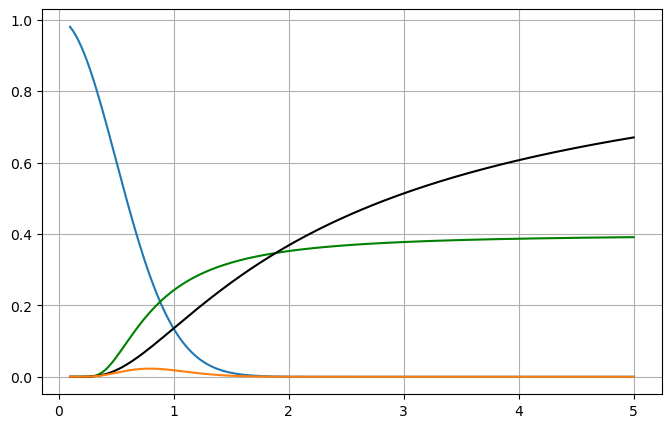

In [39]:
w = np.array([[0.0]])
x_vals = np.linspace(0.1, 5, 200).reshape(-1, 1)

kernel = GaussianKernel(sigma=0.5)


k_vals, dists = kernel(w, x_vals)
priorl2 = norm.pdf(1/dists, loc=0, scale=1)
priorl1 = laplace.pdf(1/dists, loc=0, scale=1 / 2)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, k_vals)
plt.plot(x_vals, priorl2, color='#008000')
plt.plot(x_vals, priorl1, color='#000000')
plt.plot(x_vals, k_vals * priorl1)
plt.grid(True)
plt.show()

In [22]:
x_vals_logd = np.linspace(0.1, 5, 100)
logn = lognorm.pdf(x_vals_logd, s=0.6)
logl = loglaplace.pdf(x_vals_logd, c=0.4)

In [96]:
np.exp(-0.5 * (1 / 0.5) ** 2)

0.1353352832366127

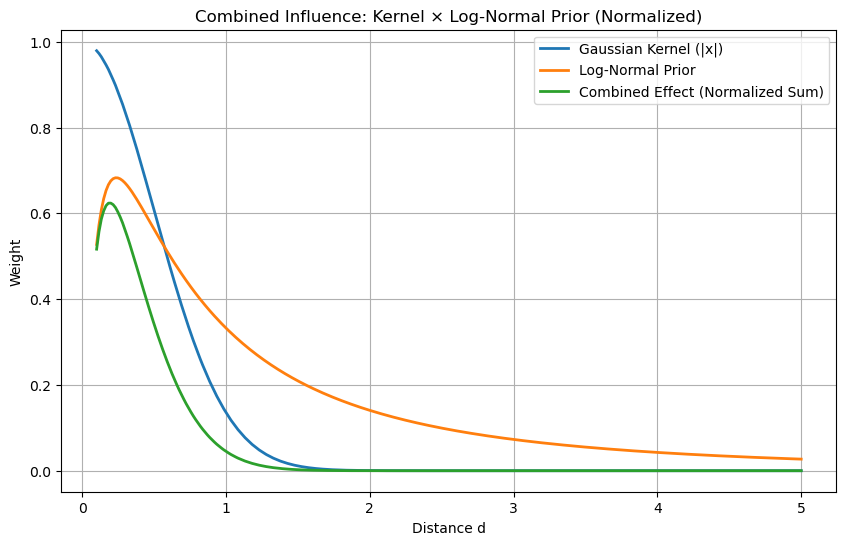

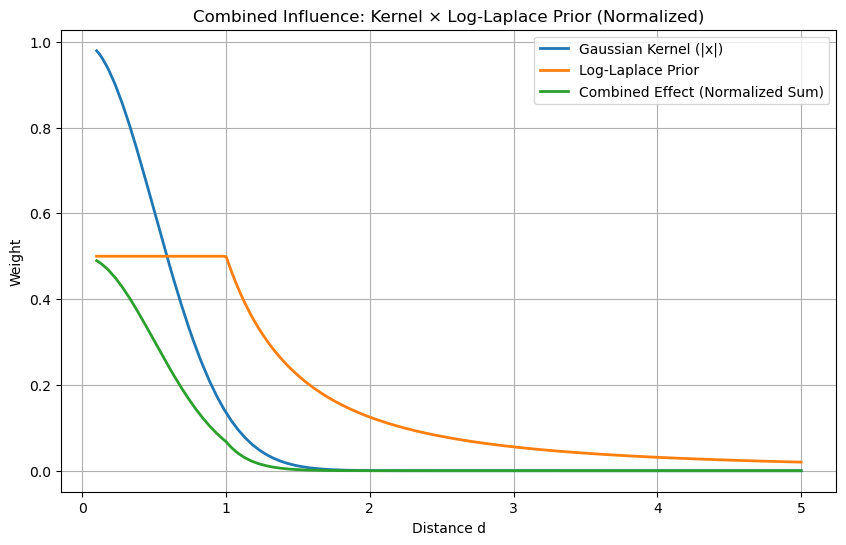

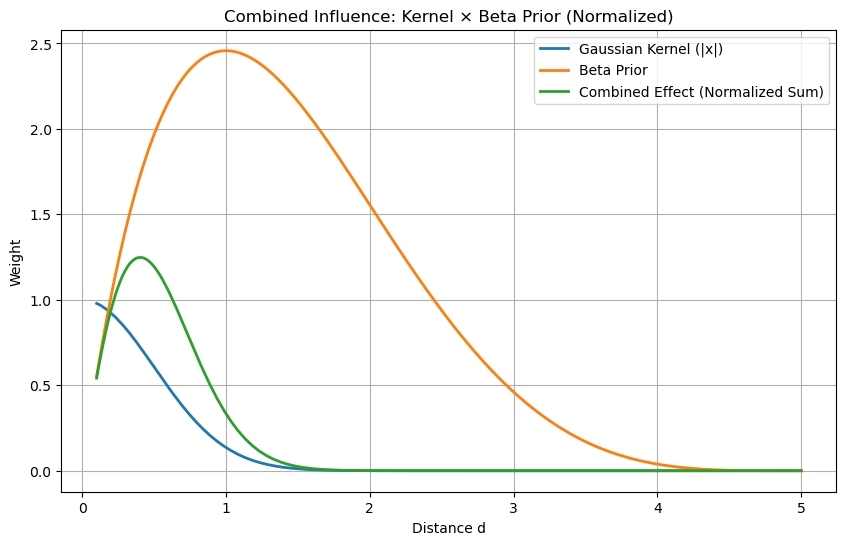

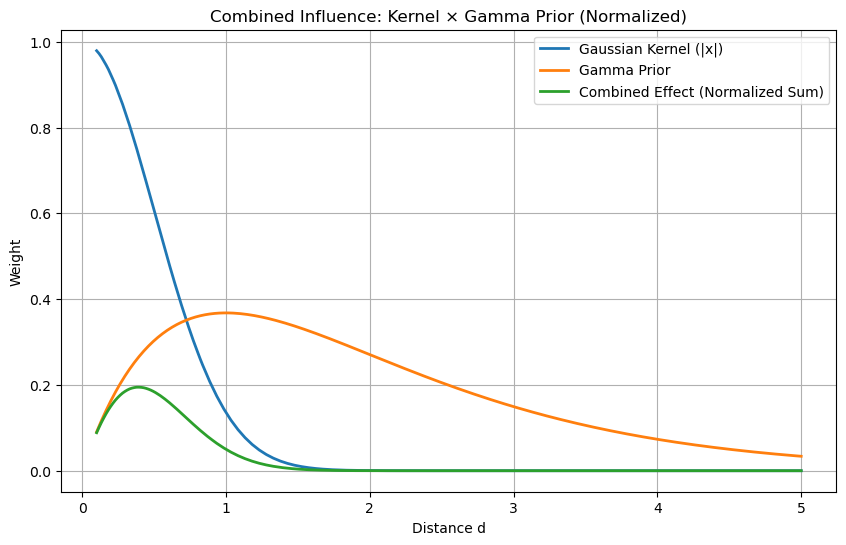

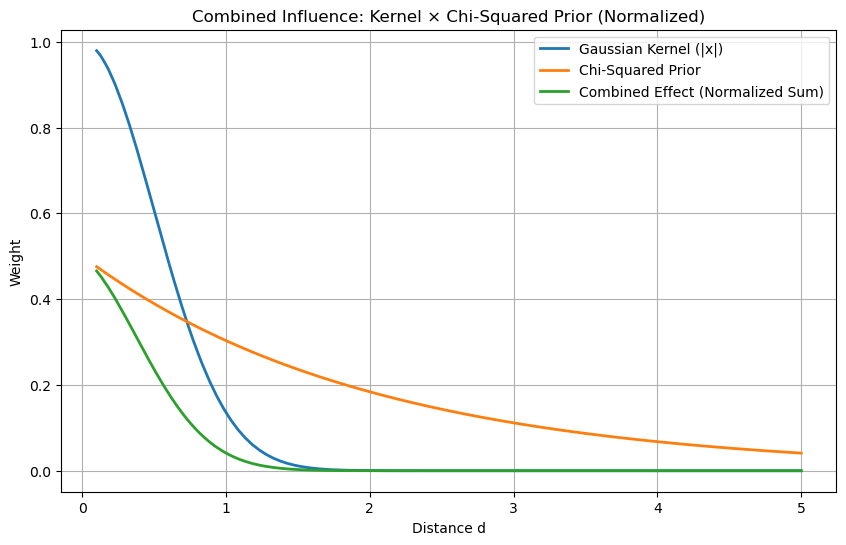

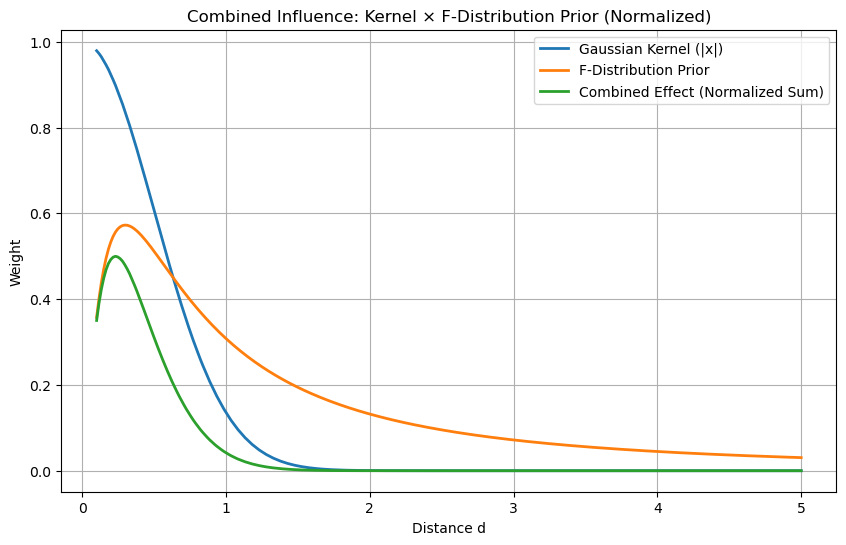

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, loglaplace, beta, gamma, chi2, f
from scipy.interpolate import interp1d

# --- Определяем Gaussian kernel ---
class GaussianKernel:
    def __init__(self, sigma):
        self.sigma = sigma

    def __call__(self, w, x):
        dists = np.linalg.norm(x - w, axis=1)
        k_vals = np.exp(-0.5 * (dists / self.sigma) ** 2)
        return k_vals, dists

# --- Данные ---
w = np.array([[0.0]])  # одна фиксированная точка
x_vals = np.linspace(-5, 5, 200).reshape(-1, 1)
kernel = GaussianKernel(sigma=0.5)
k_vals, dists = kernel(w, x_vals)
abs_dists = np.abs(x_vals.flatten())

# --- Сетка расстояний ---
x_vals_logd = np.linspace(0.1, 5, 300)

# --- Kernel на сетке prior ---
k_interp = interp1d(abs_dists, k_vals.flatten(), kind='linear', fill_value="extrapolate")
k_on_prior = k_interp(x_vals_logd)

# --- Prior распределения ---
priors = {
    'Log-Normal': lognorm.pdf(x_vals_logd, s=1.2, scale=np.exp(0)),
    'Log-Laplace': loglaplace.pdf(x_vals_logd, c=1.0),
    'Beta': beta.pdf(x_vals_logd / 5, a=2, b=5),  # нормируем на [0,1]
    'Gamma': gamma.pdf(x_vals_logd, a=2),
    'Chi-Squared': chi2.pdf(x_vals_logd, df=2),
    'F-Distribution': f.pdf(x_vals_logd, dfn=5, dfd=2)
}

# --- Визуализация ---
for name, prior in priors.items():
    combined = k_on_prior * prior

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals_logd, k_on_prior, label='Gaussian Kernel (|x|)', linewidth=2)
    plt.plot(x_vals_logd, prior, label=f'{name} Prior', linewidth=2)
    plt.plot(x_vals_logd, combined, label='Combined Effect (Normalized Sum)', linewidth=2)
    plt.xlabel('Distance d')
    plt.ylabel('Weight')
    plt.title(f'Combined Influence: Kernel × {name} Prior (Normalized)')
    plt.grid(True)
    plt.legend()
    plt.show()